 Importing Dataset

In [ ]:
# Dataset
!wget -O train.csv https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/train_genetic_disorders.csv

--2024-06-05 02:10:19--  https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/train_genetic_disorders.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/train_genetic_disorders.csv [following]
--2024-06-05 02:10:20--  https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/train_genetic_disorders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540717 (6.2M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   6.24M  --.-KB/s    in 0.1s    

2024-06-05 02:10:20 (52.3 MB/s) - ‘train.csv’ save

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Preprocessing

In [ ]:
# Reading data
data = pd.read_csv("train.csv")
data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
data.shape

(22083, 45)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

Finding the Variance


In [ ]:
data.var(numeric_only = True)

Patient Age                                          18.684736
Blood cell count (mcL)                                0.039932
Mother's age                                         96.968447
Father's age                                        169.720986
Test 1                                                0.000000
Test 2                                                0.000000
Test 3                                                0.000000
Test 4                                                0.000000
Test 5                                                0.000000
No. of previous abortion                              1.992298
White Blood cell count (thousand per microliter)      7.041770
Symptom 1                                             0.241543
Symptom 2                                             0.247216
Symptom 3                                             0.248614
Symptom 4                                             0.250006
Symptom 5                                             0

Dropping Fields

In [ ]:
# Dropping irrelevant fields
data.drop("Patient Id", axis=1, inplace=True)
data.drop("Patient First Name", axis=1, inplace=True)
data.drop("Family Name", axis=1, inplace=True)
data.drop("Father's name", axis=1, inplace=True)
data.drop("Institute Name", axis=1, inplace=True)
data.drop("Location of Institute", axis=1, inplace=True)
data.drop("Place of birth", axis=1, inplace=True)
data.drop("Parental consent", axis=1, inplace=True)
data.drop("Test 1", axis=1, inplace=True)
data.drop("Test 2", axis=1, inplace=True)
data.drop("Test 3", axis=1, inplace=True)
data.drop("Test 4", axis=1, inplace=True)
data.drop("Test 5", axis=1, inplace=True)

In [ ]:
data.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

% Of Null Values

In [ ]:
(data.isna().sum()/len(data))*100

Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Rate (rates/min                               14.024363
Follow-up                                           14.228139
Gender                                              14.196441
Birth asphyxia                                      14.173799
Autopsy shows birth defect (if applicable)          23.710547
Folic acid details (peri-conceptional)              13.970022
H/O seri

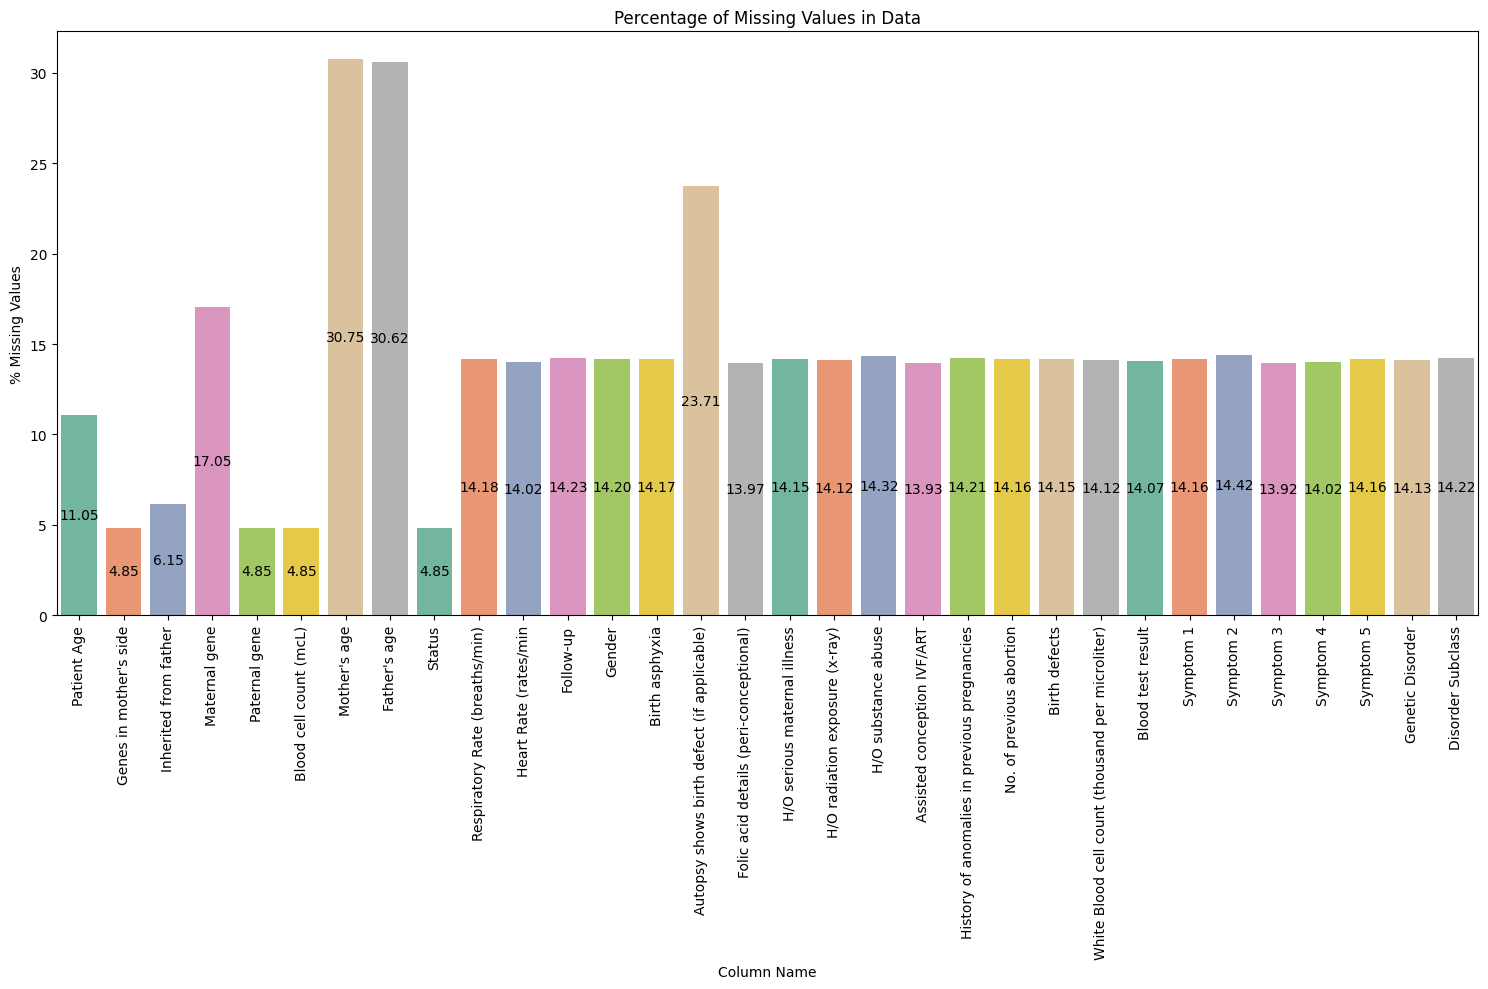

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Convert the series to a dataframe
df = (data.isna().sum()/len(data))*100
df = df.to_frame().reset_index()
df.columns = ['column_name', 'percent_missing']

# Plot the data as a bar chart
plt.figure(figsize=(15, 10))  # adjust figure size as needed
ax = sns.barplot(x="column_name", y="percent_missing", data=df, palette="Set2")

# Add value inside each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()/2, f'{p.get_height():.2f}', ha='center', va='center', size=10)

plt.xticks(rotation=90)
plt.xlabel("Column Name")
plt.ylabel("% Missing Values")
plt.title("Percentage of Missing Values in Data")
plt.tight_layout()
plt.show()

Filling the Missing Values

In [ ]:
# Imputation
from collections import Counter

imputed_data = data.copy()

def Imputer(data):
    for col in data:
        c = Counter(data[col])
        if(c.most_common(1)[0][0] == np.nan):
            data[col] = data[col].replace(np.nan, c.most_common(1)[1][0])
        else:
            data[col] = data[col].replace(np.nan, c.most_common(1)[0][0])

Imputer(imputed_data)

(imputed_data.isna().sum()/len(imputed_data))*100

Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Mother's age                                        0.0
Father's age                                        0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Follow-up                                           0.0
Gender                                              0.0
Birth asphyxia                                      0.0
Autopsy shows birth defect (if applicable)          0.0
Folic acid details (peri-conceptional)              0.0
H/O serious maternal illness                        0.0
H/O radiation exposure (x-ray)                  

Unique Values of Features

In [ ]:
for col in data:
    print(f"Unique values of {col} - {imputed_data[col].unique()}")

Unique values of Patient Age - [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. 10.  5. 13.  8.  9.]
Unique values of Genes in mother's side - ['Yes' 'No']
Unique values of Inherited from father - ['No' 'Yes']
Unique values of Maternal gene - ['Yes' 'No']
Unique values of Paternal gene - ['No' 'Yes']
Unique values of Blood cell count (mcL) - [4.76060309 4.91066906 4.89329743 ... 5.08483063 5.22482777 5.13794212]
Unique values of Mother's age - [23. 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 49. 46. 18. 38. 37.
 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Unique values of Father's age - [20. 23. 22. 63. 44. 42. 56. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52. 28.
 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59. 47.
 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Unique values of Status - ['Alive' 'Deceased']
Unique values of Respiratory Rate (breaths/min) - ['Normal (30-60)' 'Tachypnea']
Unique values of Heart Rate (rates/min - ['Normal' 'Tachycardia']
Unique valu

In [ ]:
data=imputed_data

## Data Visualization

  0%|          | 0/30 [00:00<?, ?it/s]

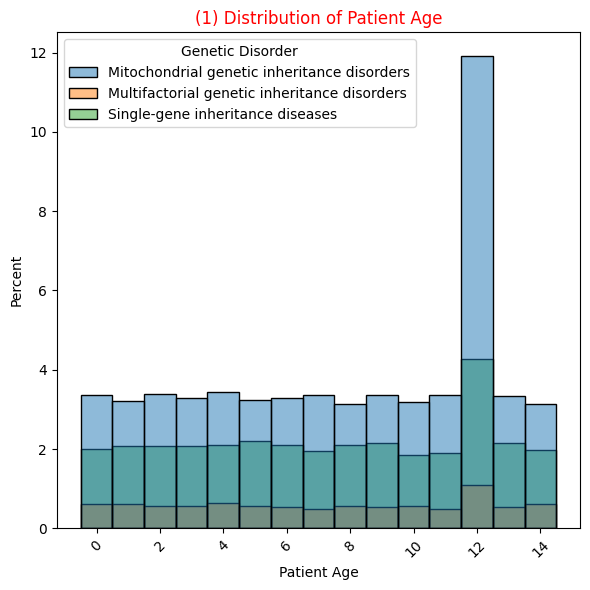

  3%|▎         | 1/30 [00:01<00:41,  1.45s/it]

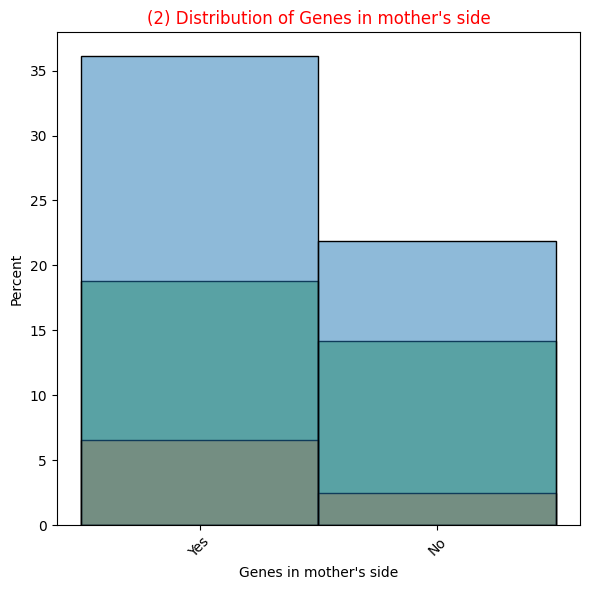

  7%|▋         | 2/30 [00:02<00:40,  1.45s/it]

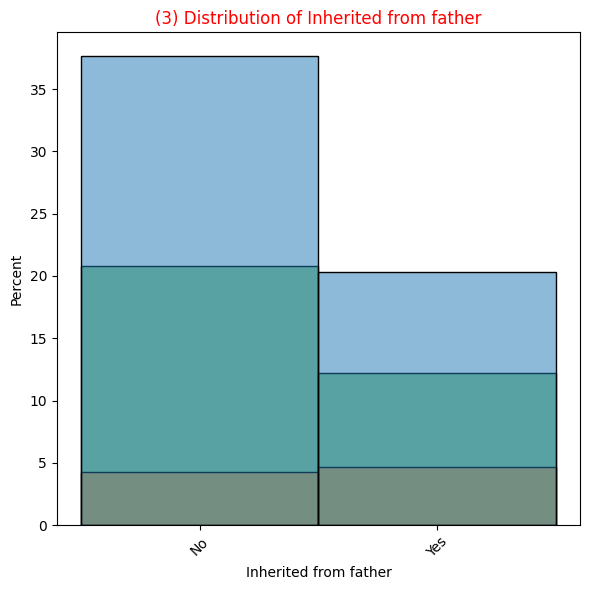

 10%|█         | 3/30 [00:04<00:36,  1.35s/it]

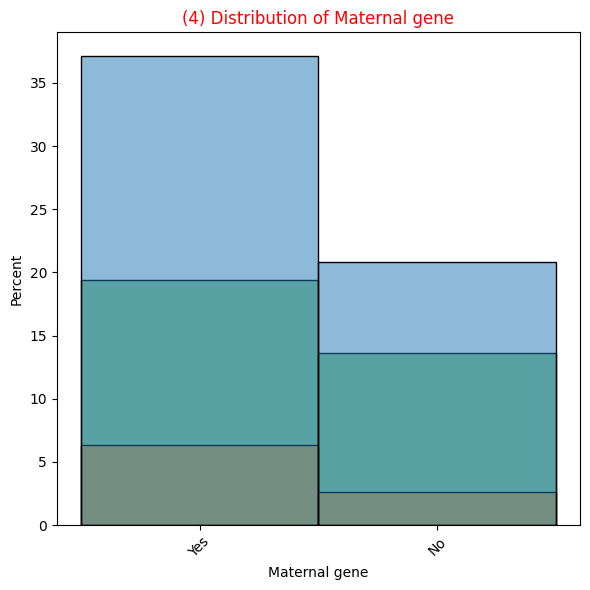

 13%|█▎        | 4/30 [00:05<00:34,  1.32s/it]

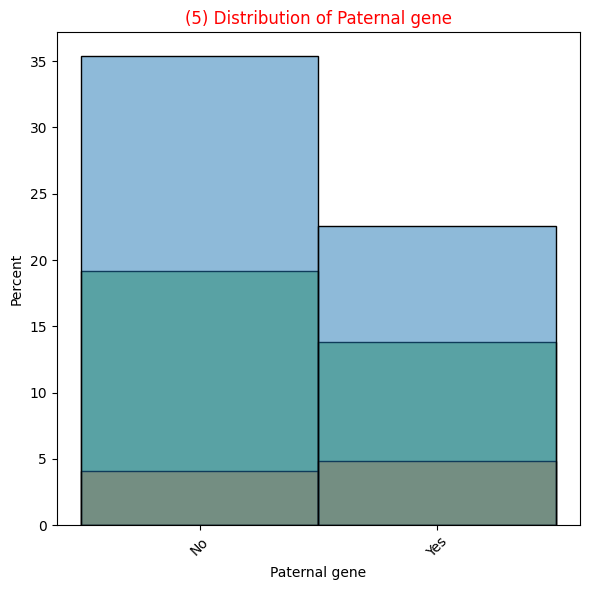

 17%|█▋        | 5/30 [00:06<00:28,  1.15s/it]

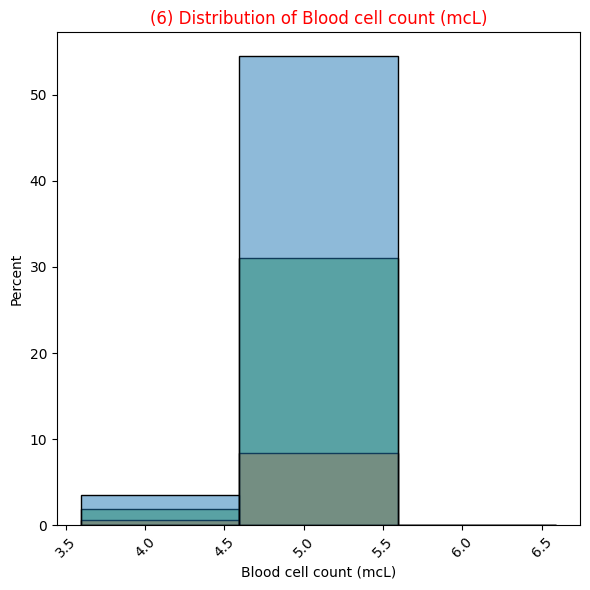

 20%|██        | 6/30 [00:07<00:27,  1.14s/it]

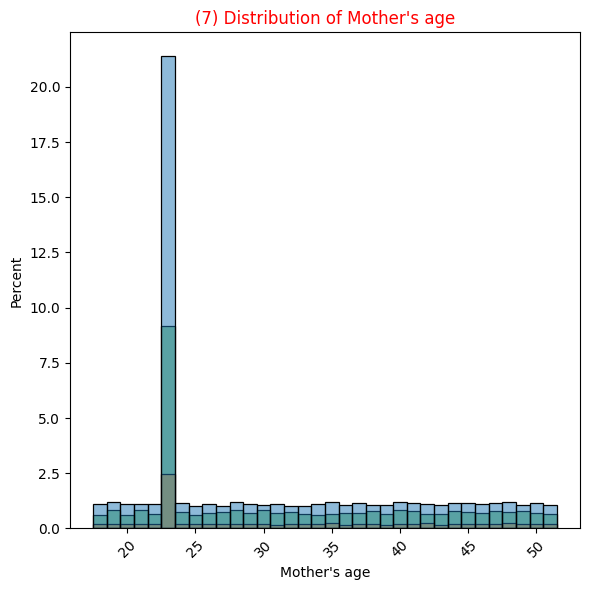

 23%|██▎       | 7/30 [00:08<00:29,  1.27s/it]

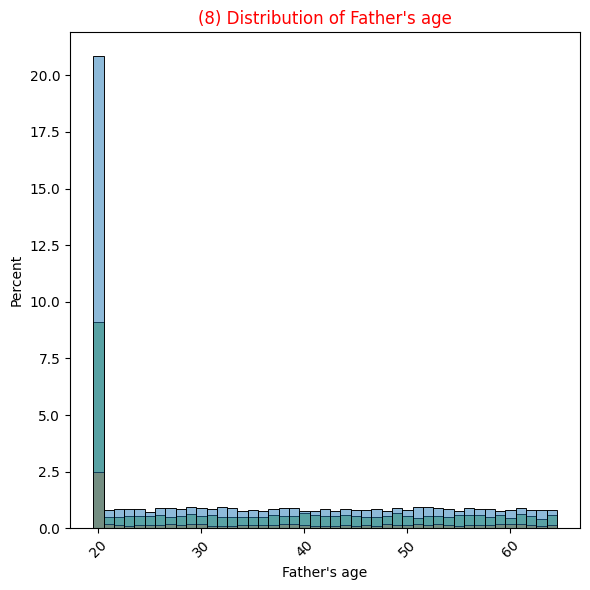

 27%|██▋       | 8/30 [00:10<00:32,  1.46s/it]

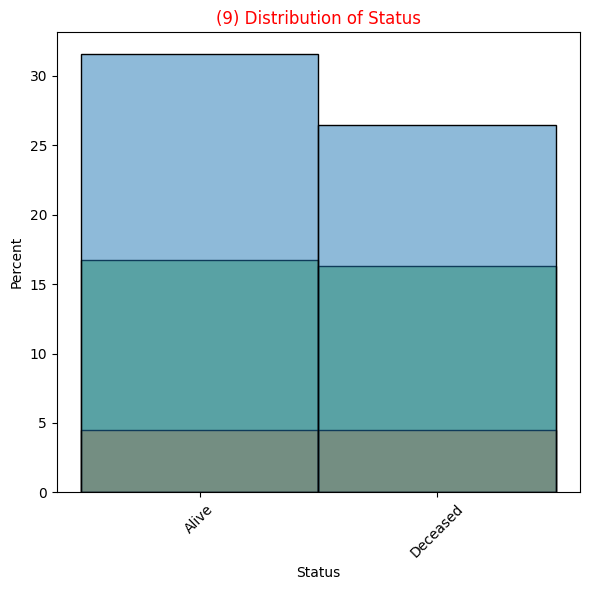

 30%|███       | 9/30 [00:11<00:28,  1.37s/it]

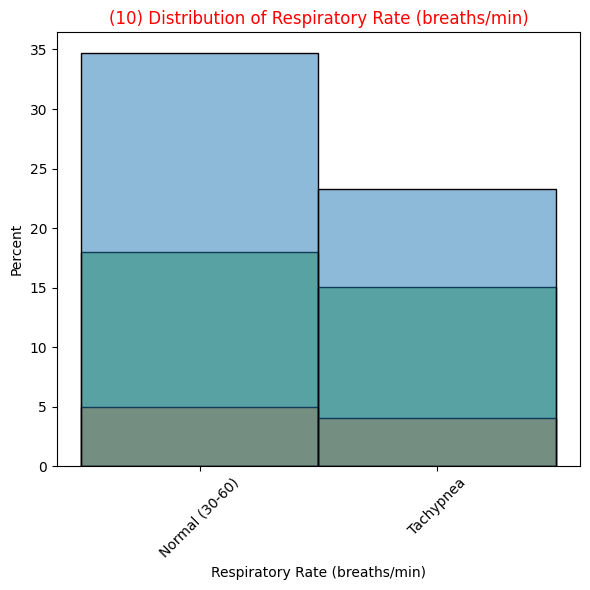

 33%|███▎      | 10/30 [00:13<00:26,  1.31s/it]

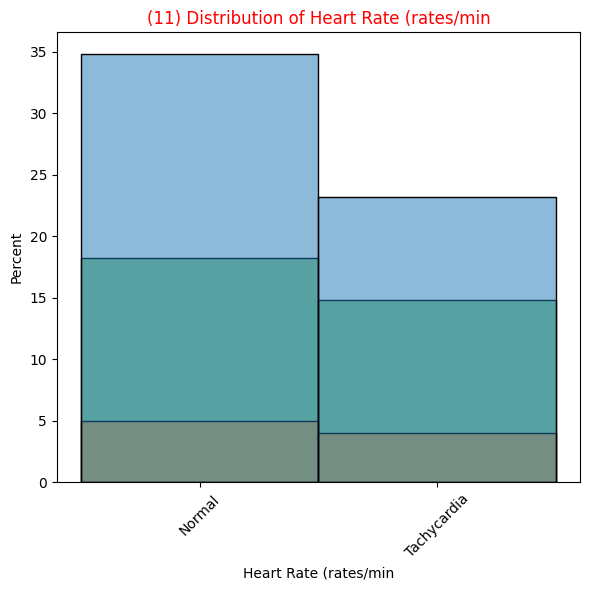

 37%|███▋      | 11/30 [00:15<00:30,  1.62s/it]

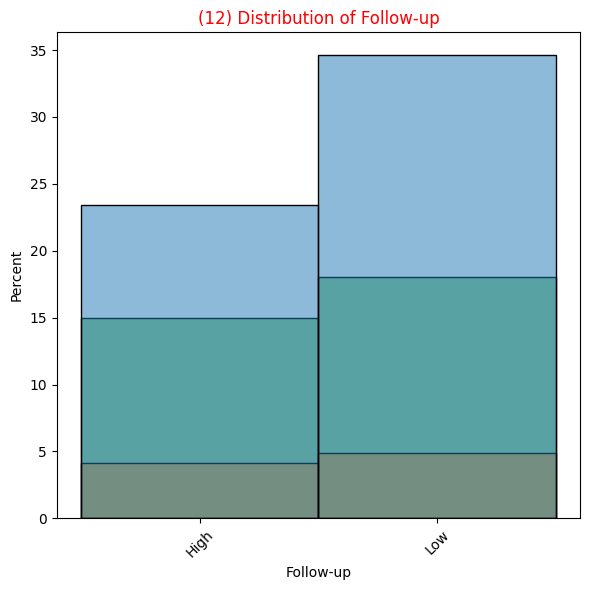

 40%|████      | 12/30 [00:16<00:28,  1.56s/it]

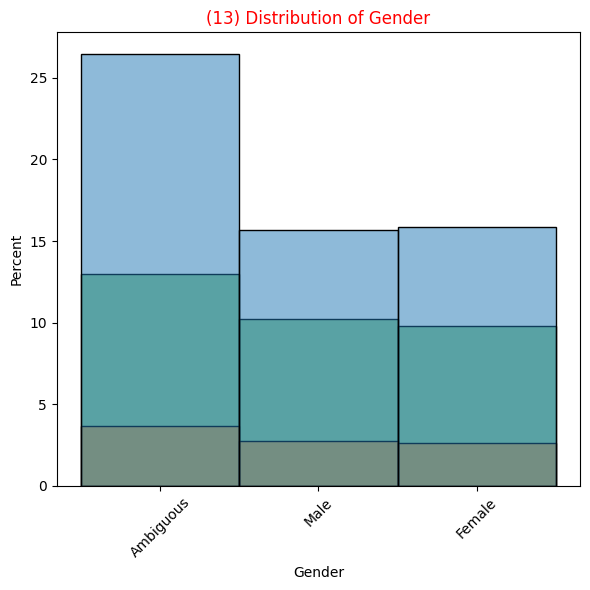

 43%|████▎     | 13/30 [00:18<00:27,  1.61s/it]

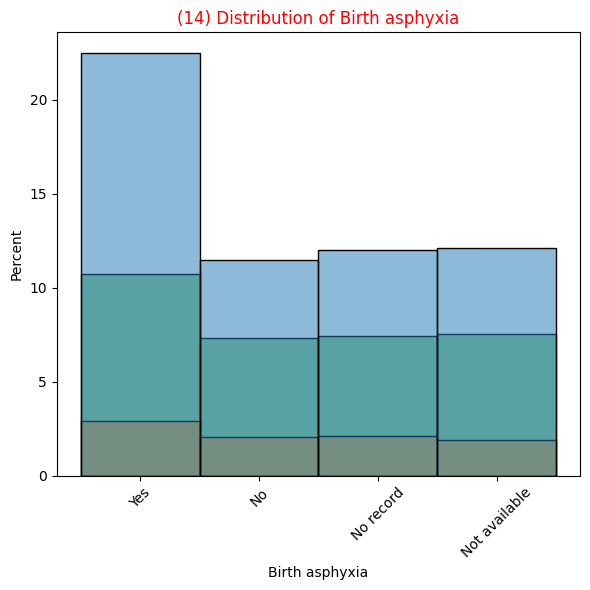

 47%|████▋     | 14/30 [00:19<00:23,  1.46s/it]

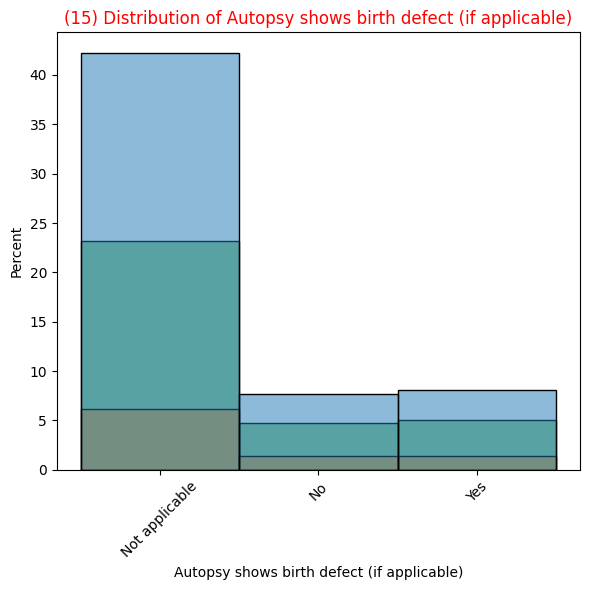

 50%|█████     | 15/30 [00:20<00:18,  1.24s/it]

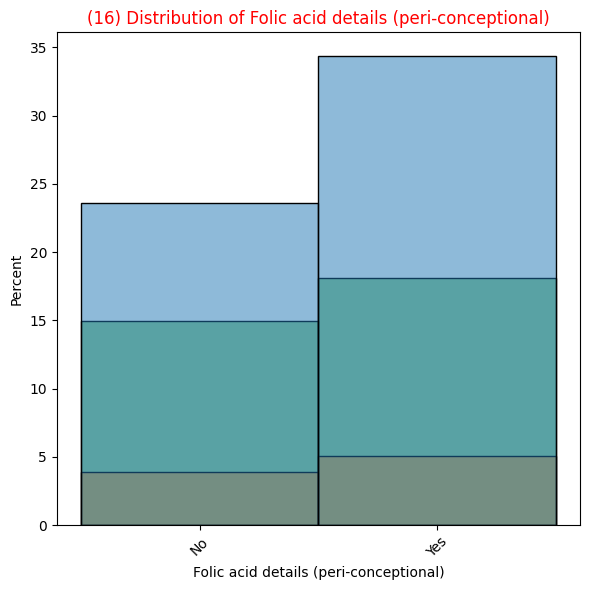

 53%|█████▎    | 16/30 [00:21<00:15,  1.12s/it]

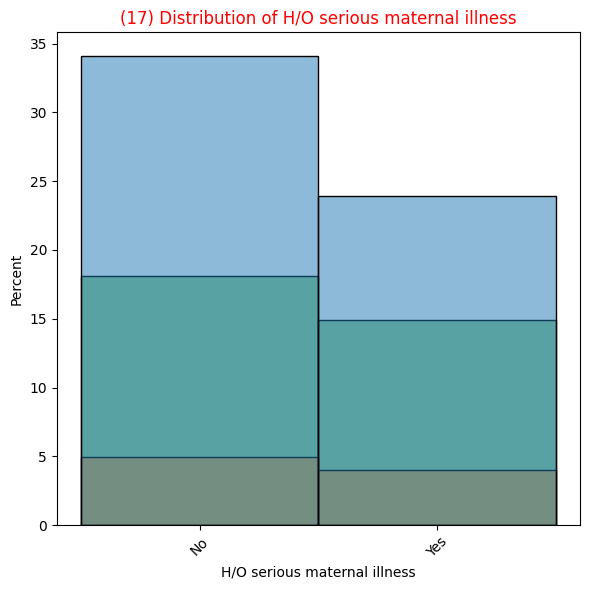

 57%|█████▋    | 17/30 [00:21<00:12,  1.03it/s]

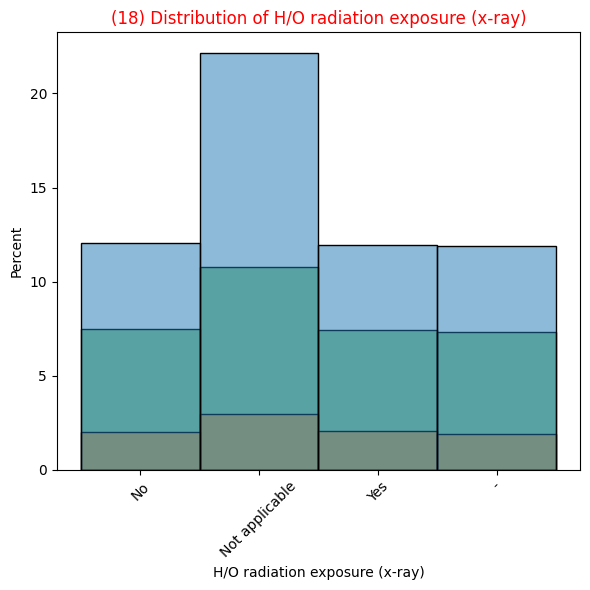

 60%|██████    | 18/30 [00:22<00:11,  1.08it/s]

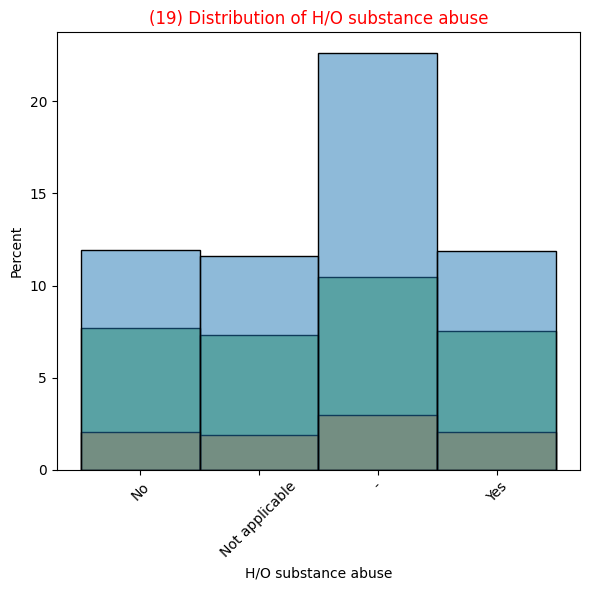

 63%|██████▎   | 19/30 [00:23<00:09,  1.11it/s]

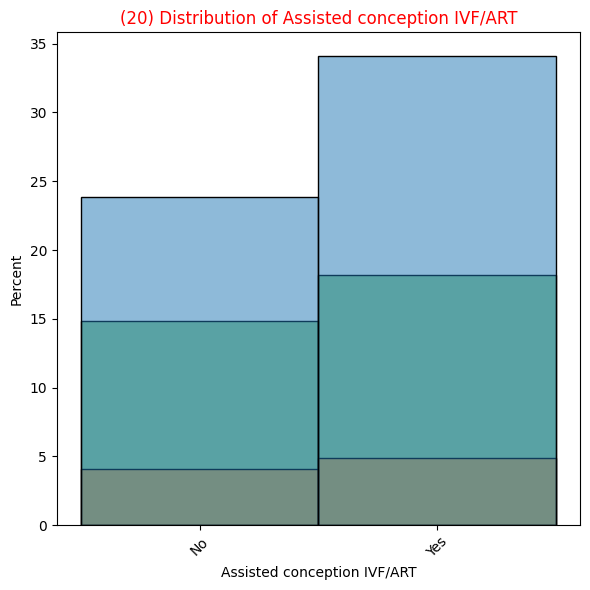

 67%|██████▋   | 20/30 [00:24<00:09,  1.10it/s]

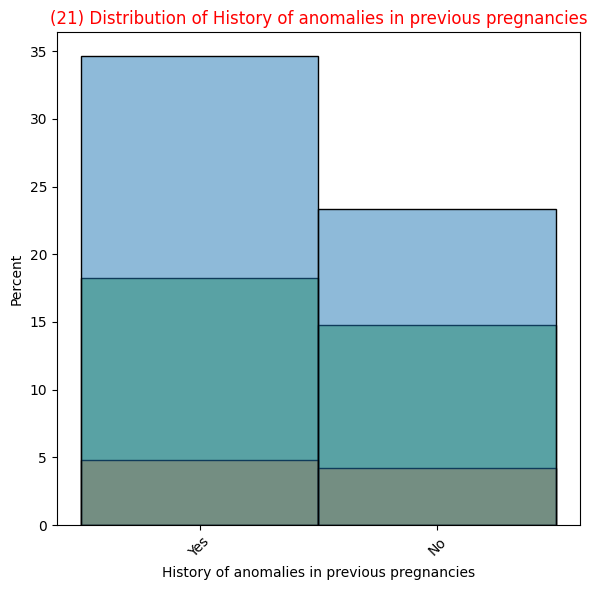

 70%|███████   | 21/30 [00:25<00:08,  1.06it/s]

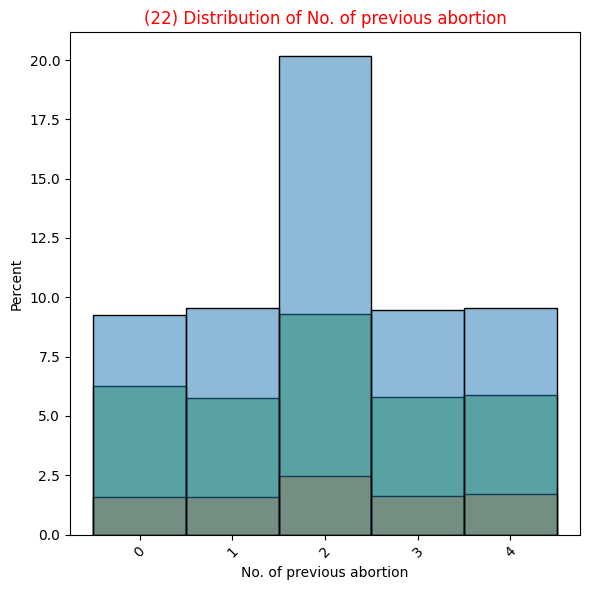

 73%|███████▎  | 22/30 [00:26<00:07,  1.10it/s]

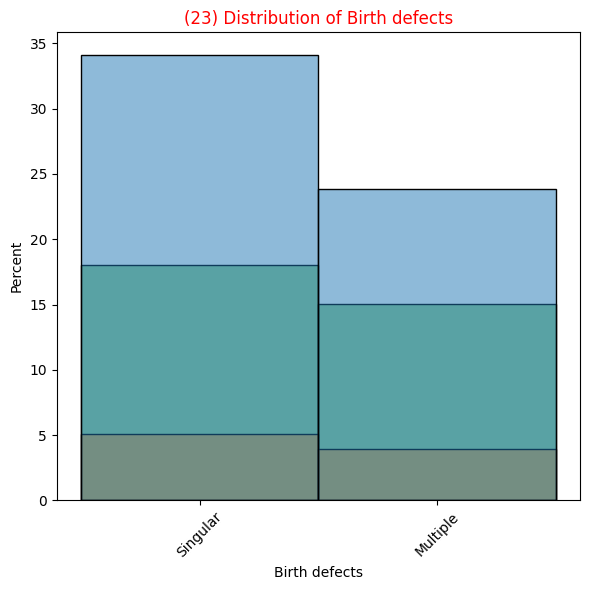

 77%|███████▋  | 23/30 [00:27<00:06,  1.16it/s]

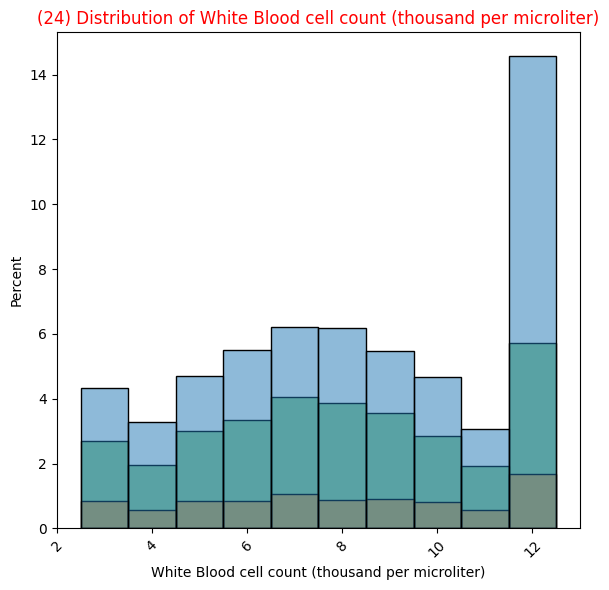

 80%|████████  | 24/30 [00:27<00:05,  1.18it/s]

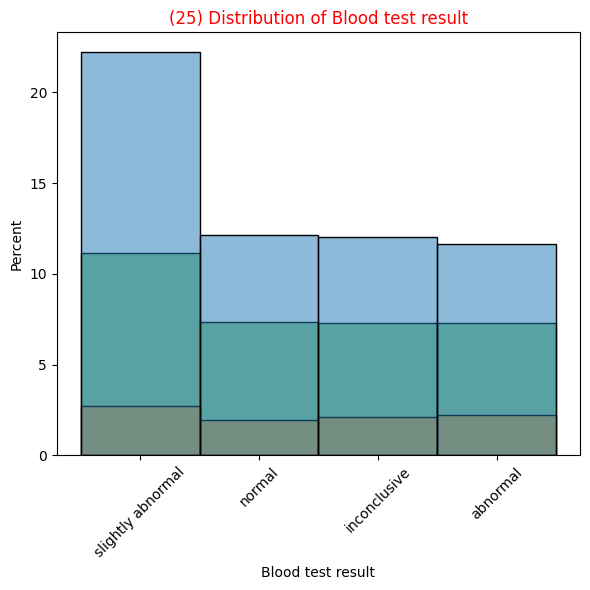

 83%|████████▎ | 25/30 [00:28<00:04,  1.24it/s]

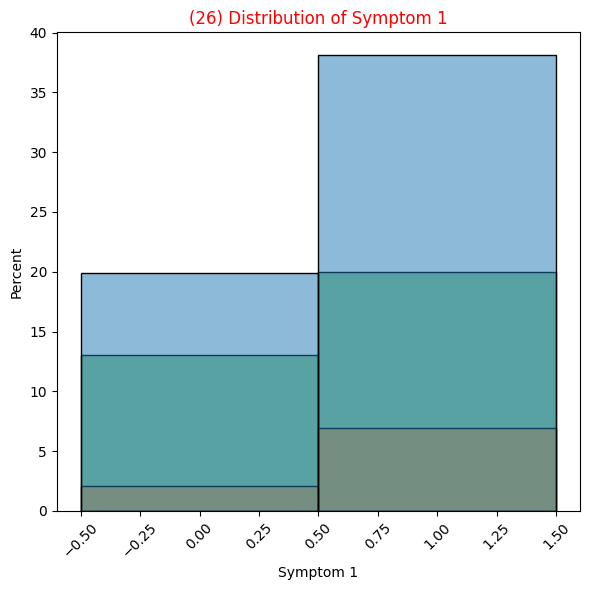

 87%|████████▋ | 26/30 [00:30<00:04,  1.03s/it]

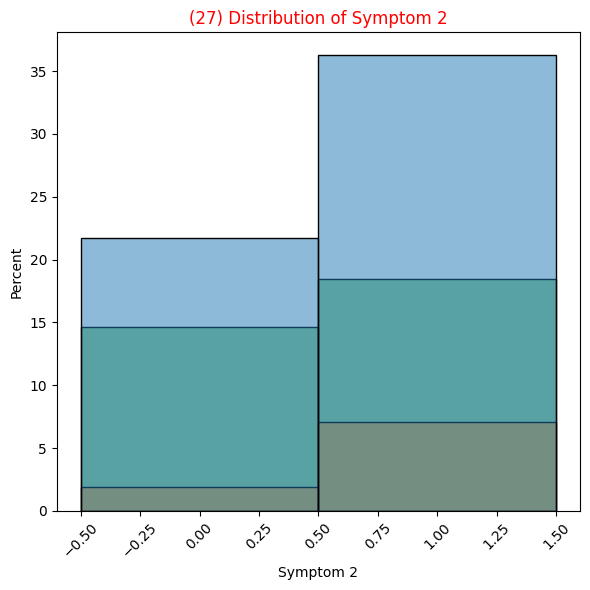

 90%|█████████ | 27/30 [00:32<00:03,  1.27s/it]

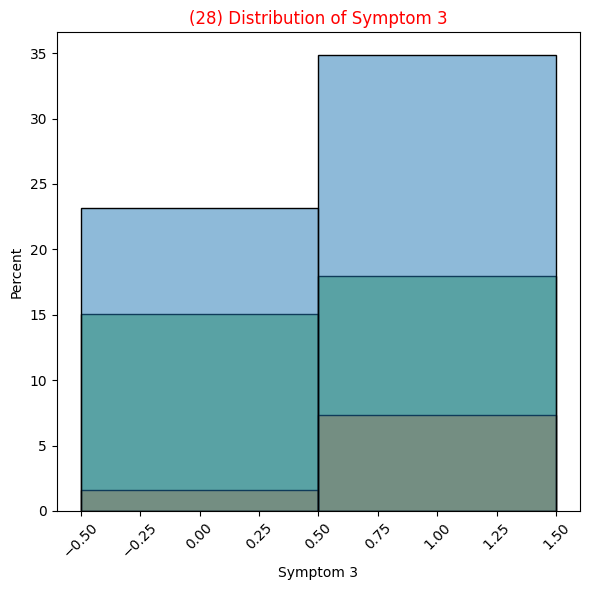

 93%|█████████▎| 28/30 [00:33<00:02,  1.39s/it]

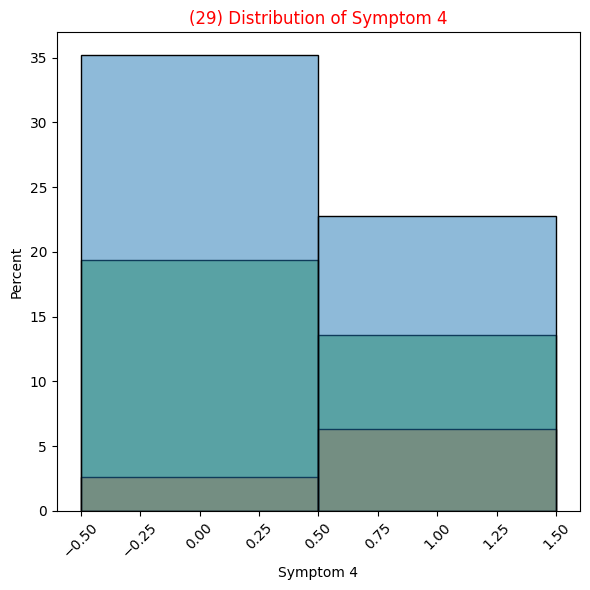

 97%|█████████▋| 29/30 [00:34<00:01,  1.30s/it]

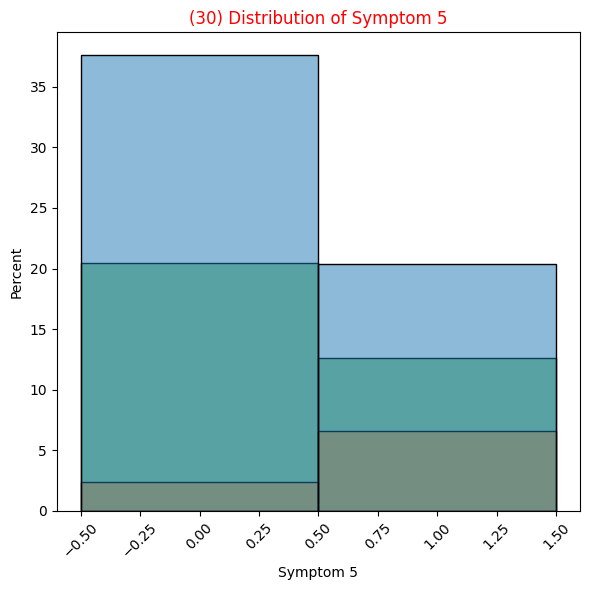

100%|██████████| 30/30 [00:35<00:00,  1.19s/it]


In [ ]:
from tqdm import tqdm
for i in tqdm(range(0, 30)):

    plt.figure(figsize=(6, 6))  # adjust figure size as needed
    ax = plt.gca()
    if i == 0:
        sns.histplot(x=data.columns[i], hue='Genetic Disorder', data=data, ax=ax, discrete=True, legend=True, stat='percent')
    else:
        sns.histplot(x=data.columns[i], hue='Genetic Disorder', data=data, ax=ax, discrete=True, legend=False, stat='percent')


    plt.title(f'({i+1}) Distribution of {data.columns[i]}', color='red')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

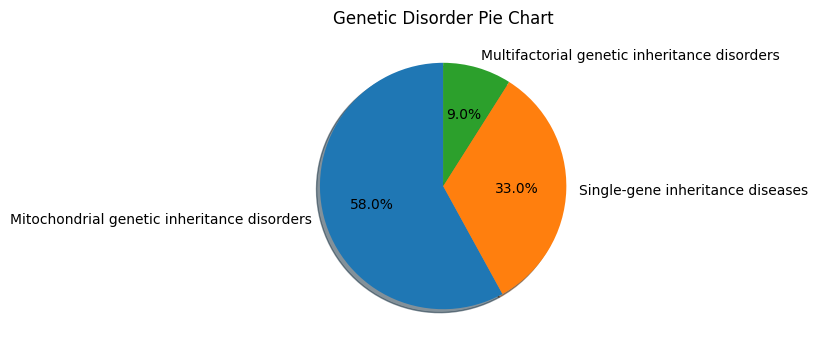

In [ ]:
#visualizing in Pie chart
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)
plt.figure(figsize = (4,4))
plt.pie(data['Genetic Disorder'].value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.title('Genetic Disorder Pie Chart')
plt.show()

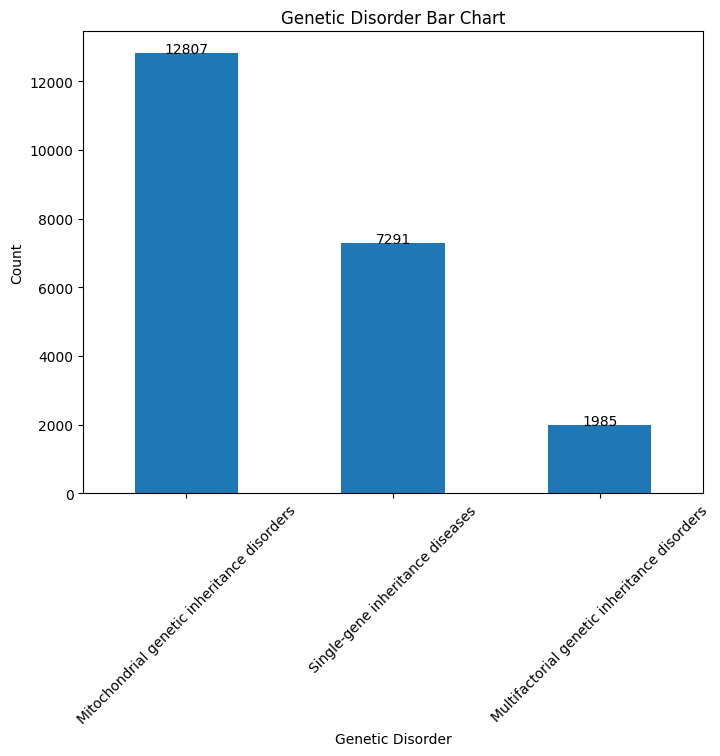

In [ ]:
import matplotlib.pyplot as plt

# Get values and labels
disorder_values = data['Genetic Disorder'].value_counts()
disorder_labels = disorder_values.index.to_list()

plt.figure(figsize=(8, 6))

# Create a bar plot
bar_plot = disorder_values.plot(kind='bar')

# Add a title
plt.title('Genetic Disorder Bar Chart')

# Add x and y labels
plt.ylabel('Count')

# Rotate x-tick labels
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, bar.get_height(), ha='center')

plt.show()

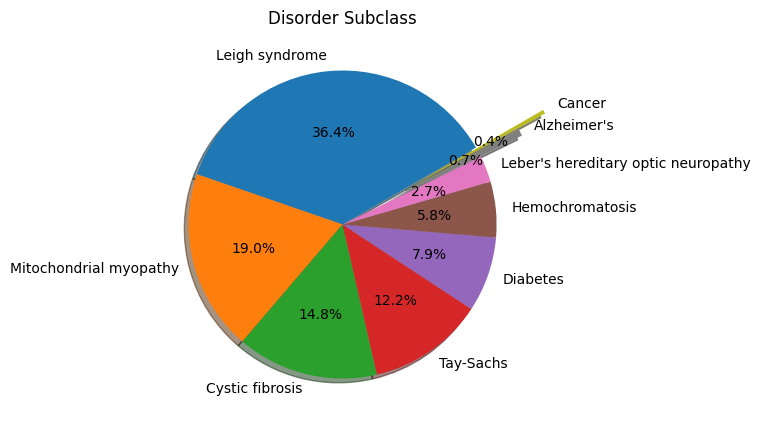

In [ ]:
#visualizing in Pie chart
labels2 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode2 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)
plt.figure(figsize = (5,5))
plt.pie(data['Disorder Subclass'].value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);
plt.title('Disorder Subclass')
plt.show()

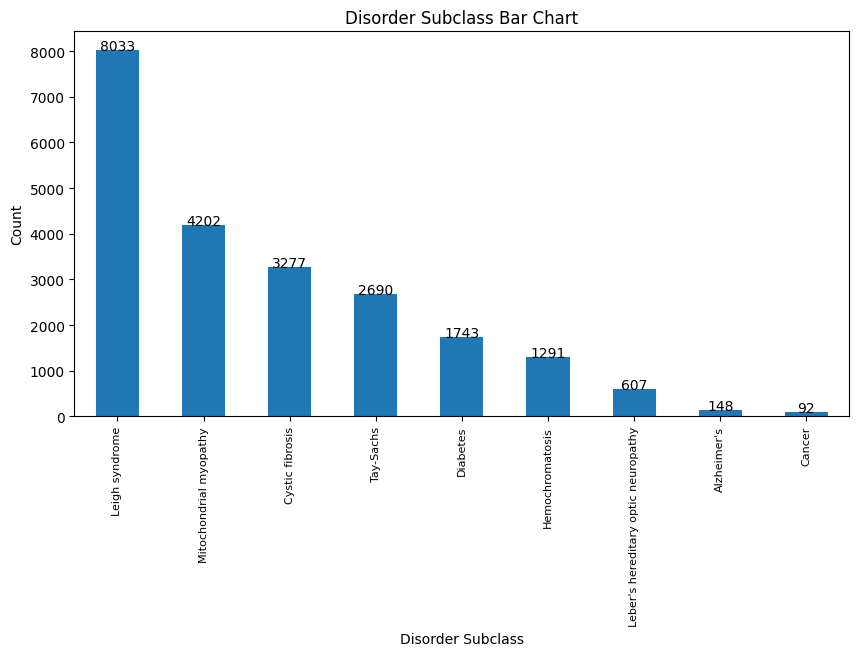

In [ ]:
# Get values and labels
disorder_values = data['Disorder Subclass'].value_counts()
disorder_labels = disorder_values.index.to_list()

plt.figure(figsize=(10, 5))

# Create a bar plot
bar_plot = disorder_values.plot(kind='bar')

# Add a title
plt.title('Disorder Subclass Bar Chart')

# Add x and y labels
plt.ylabel('Count')

# Rotate x-tick labels
plt.xticks(rotation=90,fontsize=8)

# Add values on top of bars
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, bar.get_height(), ha='center')
plt.show()

 Encoding Values

In [ ]:
# Encoding
encoded_data = imputed_data.copy()
mapping = {}

encode = lambda data_col, unique_row : [unique_row.index(elm) for elm in data_col]
decode = lambda data_col, unique_row : [unique_row[elm] for elm in data_col]

for col in encoded_data:
    if(encoded_data[col].dtype == 'object'):
        mapping[col] = encoded_data[col].unique()
        encoded_data[col] = encode(encoded_data[col],mapping[col].tolist())

encoded_data['Genetic Disorder'][:5]

0    0
1    0
2    1
3    0
4    1
Name: Genetic Disorder, dtype: int64

In [ ]:
decode(encoded_data['Genetic Disorder'][:5],mapping['Genetic Disorder'])

['Mitochondrial genetic inheritance disorders',
 'Mitochondrial genetic inheritance disorders',
 'Multifactorial genetic inheritance disorders',
 'Mitochondrial genetic inheritance disorders',
 'Multifactorial genetic inheritance disorders']

In [ ]:
encoded_data['Genetic Disorder'].value_counts()

Genetic Disorder
0    12807
2     7291
1     1985
Name: count, dtype: int64

## Resampling of data

In [ ]:
# Resampling
resampled_data = encoded_data.copy()

def resample(data, target_col, strategy='min'):
    min_count = min(data[target_col].value_counts())
    max_count = max(data[target_col].value_counts())
    count=0
    if(strategy == 'min'):
      count = min_count
    else:
      count = max_count
    sampled_data = []
    for unique_value in data[target_col].unique():
        unique_data = data[data[target_col] == unique_value]
        sampled_unique_data = unique_data.sample(n=count,replace=True, random_state=42)
        sampled_data.append(sampled_unique_data)
    sampled_data = pd.concat(sampled_data)
    # Shuffle
    sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
    return sampled_data

resampled_data = resample(resampled_data,'Genetic Disorder','max')
resampled_data['Genetic Disorder'].value_counts()


Genetic Disorder
1    12807
0    12807
2    12807
Name: count, dtype: int64

In [ ]:
y = resampled_data['Genetic Disorder'].to_numpy()
y_sub = resampled_data['Disorder Subclass'].to_numpy()
X = resampled_data.drop(['Genetic Disorder','Disorder Subclass'],axis=1).to_numpy()

In [ ]:
X.shape

(38421, 30)

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(30)
pca.fit(X)
print(pca.explained_variance_ratio_.sum())

0.9999999999999998


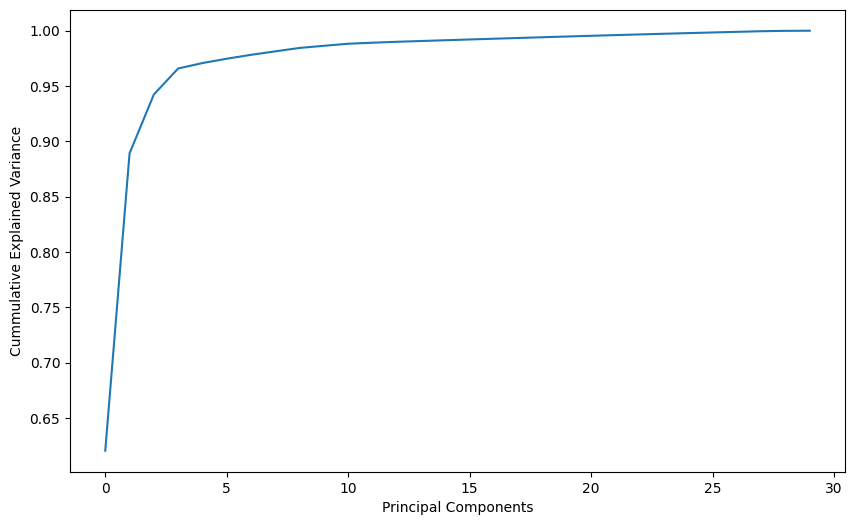

Number of principal components to take - 5


In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.97) + 1
print(f'Number of principal components to take - {d}')

In [ ]:
pca = PCA(d)
pca.fit(X)
projected_X = pca.transform(X)
print(X.shape)
print(projected_X.shape)

(38421, 30)
(38421, 5)


## Scaling

In [ ]:
# Scaling
scaled_X = projected_X.copy()

def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

scaled_X = normalize(scaled_X)
print(np.max(scaled_X, axis=0))
print(np.max(projected_X, axis=0))

[1. 1. 1. 1. 1.]
[30.35172977 21.44032879  8.12084414  5.62932877  2.19140988]


In [ ]:
def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
np.random.seed = 42

def k_fold_cross_validation(model, X, y, k=5, shuffle=False):
    # Shuffle the data
    if(shuffle):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

    # Splitting the data
    folds = np.array_split(indices, k)
    accuracies = []

    # Validating
    for i in range(k):
        test_indices = folds[i]
        train_indices = np.hstack([folds[j] for j in range(k) if j != i])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    return mean_accuracy, std_accuracy

## Model Training

### Genetic Disorder

### Prediction and Evaluation



Accuracy for KNeighborsClassifier : 0.675906552140723


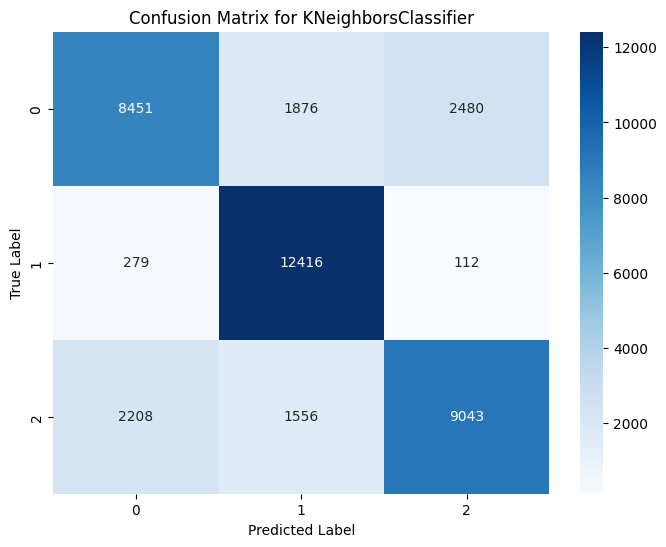

              precision    recall  f1-score   support

           0       0.77      0.66      0.71     12807
           1       0.78      0.97      0.87     12807
           2       0.78      0.71      0.74     12807

    accuracy                           0.78     38421
   macro avg       0.78      0.78      0.77     38421
weighted avg       0.78      0.78      0.77     38421

Accuracy for DecisionTreeClassifier : 0.8769683906634782


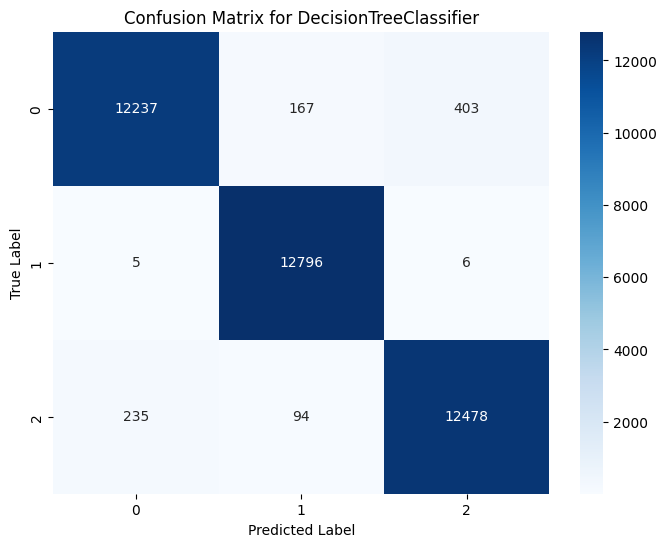

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12807
           1       0.98      1.00      0.99     12807
           2       0.97      0.97      0.97     12807

    accuracy                           0.98     38421
   macro avg       0.98      0.98      0.98     38421
weighted avg       0.98      0.98      0.98     38421

Accuracy for RandomForestClassifier : 0.8894614331819289


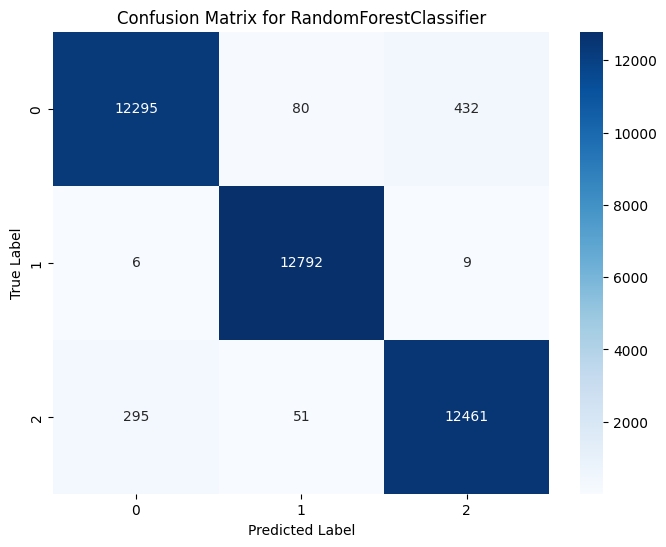

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12807
           1       0.99      1.00      0.99     12807
           2       0.97      0.97      0.97     12807

    accuracy                           0.98     38421
   macro avg       0.98      0.98      0.98     38421
weighted avg       0.98      0.98      0.98     38421

Accuracy for ExtraTreesClassifier : 0.8929749198750786


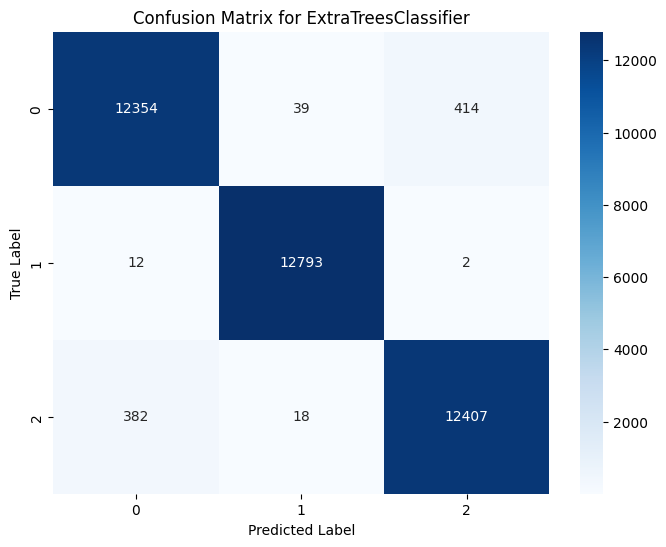

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     12807
           1       1.00      1.00      1.00     12807
           2       0.97      0.97      0.97     12807

    accuracy                           0.98     38421
   macro avg       0.98      0.98      0.98     38421
weighted avg       0.98      0.98      0.98     38421

Accuracy for XGBClassifier : 0.7371486907877424


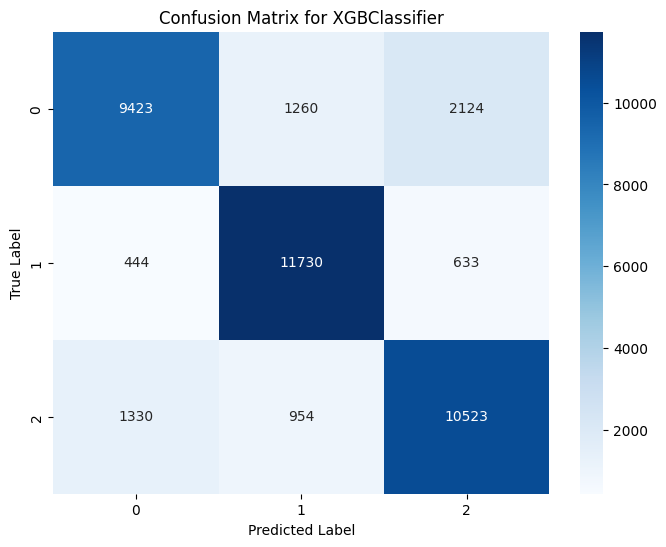

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     12807
           1       0.84      0.92      0.88     12807
           2       0.79      0.82      0.81     12807

    accuracy                           0.82     38421
   macro avg       0.83      0.82      0.82     38421
weighted avg       0.83      0.82      0.82     38421



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
]

accuracies = {}
conf_matrices = {}

for model in models:
    accuracy,_ = k_fold_cross_validation(model,scaled_X,y,5,True)
    print(f"Accuracy for {type(model).__name__} : {accuracy}")
    accuracies[type(model).__name__] = accuracy
    df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
    df.to_csv('disorder_model_accuracies.csv', index=False)

    y_pred = model.predict(scaled_X)


    conf_matrix = confusion_matrix(y, y_pred)
    conf_matrices[type(model).__name__] = conf_matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(classification_report(y, y_pred))

In [ ]:
df

,Model,Accuracy
0,KNeighborsClassifier,0.675907
1,DecisionTreeClassifier,0.876968
2,RandomForestClassifier,0.889461
3,ExtraTreesClassifier,0.892975
4,XGBClassifier,0.737149


Plotting of Model Accuracies

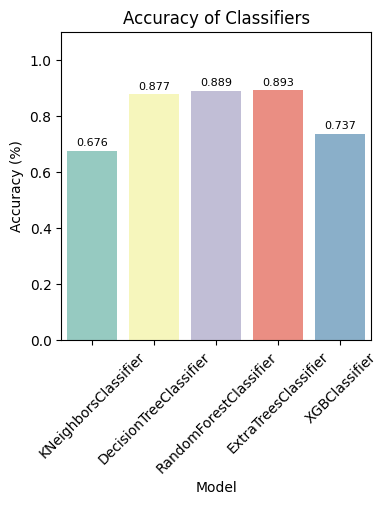

In [ ]:
mod_acc = df
plt.figure(figsize=(4, 4))

sns.barplot(data=mod_acc, x="Model", y="Accuracy", palette="Set3")

plt.title("Accuracy of Classifiers", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=10)

# Add the values to every plot
for i, (model, accuracy) in enumerate(zip(mod_acc["Model"], mod_acc["Accuracy"])):
    plt.text(i, accuracy + 0.01, f"{accuracy:.3f}", ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.ylim(top=1.1)

plt.show()

### Train-Test Split
Splitting the dataset using 3 different ratios for 3 batches in the respective order:


*   90-10 split
*   80-20 split
*   70-30 split





In [ ]:
# Train Test splitting
def train_test_split(X,y,test_size=0.2):
    split_idx = len(X) - int(test_size * len(X))
    train_X, train_y = X[:split_idx], y[:split_idx]
    test_X, test_y = X[split_idx:], y[split_idx:]
    return train_X, train_y, test_X, test_y

In [ ]:
batches = []
for i in range(1,4,1):
    size = i/10
    train_X, train_y, test_X, test_y = train_test_split(scaled_X,y,size)
    batch = [train_X, train_y, test_X, test_y]
    batches.append(batch)

In [ ]:
batches[0][0]

array([[0.65109147, 0.2791103 , 0.56023522, 0.28717042, 0.96351193],
       [0.22703021, 0.30275515, 0.0714069 , 0.17923832, 0.96114711],
       [0.31242532, 0.53531545, 0.31464354, 0.507797  , 0.96286444],
       ...,
       [0.07775335, 0.2491079 , 0.41480286, 0.721081  , 0.95253464],
       [0.77547009, 0.74305488, 0.71205239, 0.09050666, 0.2802422 ],
       [0.77587125, 0.7432102 , 0.59315908, 0.4239483 , 0.96735264]])

### Hyperparameter Tuning

KNN


> *Highest Accuracy for KNeighborsClassifier: 0.8894*




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model_name = KNeighborsClassifier()
best_accuracies = {}

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=KNeighborsClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    # Update the highest accuracy attained for this batch
    highest_accuracy = max(highest_accuracy, test_score)

# Store the highest accuracy attained for this model

best_accuracies[type(model_name).__name__] = highest_accuracy

# Print the highest accuracy attained for this model
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.8893805309734514
--------------------------------------------------
Batch  2
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.8727225403435711
--------------------------------------------------
Batch  3
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.8467811903522471
--------------------------------------------------

Highest Accuracy for KNeighborsClassifier: 0.8894


Decision Tree


> *Highest Accuracy for DecisionTreeClassifier: 0.8116*



In [ ]:
# Decision tree
model_name = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    highest_accuracy = max(highest_accuracy, test_score)


best_accuracies[type(model_name).__name__] = highest_accuracy

print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.8115564809994794
--------------------------------------------------
Batch  2
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.7899531494013534
--------------------------------------------------
Batch  3
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.7706055873676905
--------------------------------------------------

Highest Accuracy for DecisionTreeClassifier: 0.8116


Random Forest

> *Highest Accuracy for RandomForestClassifier: 0.9089*



In [ ]:
# Random forest
model_name = RandomForestClassifier()
param_grid = {
    'n_estimators': [50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'random_state': [42],
}
highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator = RandomForestClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv=5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    highest_accuracy = max(highest_accuracy, test_score)


best_accuracies[type(model_name).__name__] = highest_accuracy

print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.9089016137428423
--------------------------------------------------
Batch  2
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.8921134825611661
--------------------------------------------------
Batch  3
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.872809300711435
--------------------------------------------------

Highest Accuracy for RandomForestClassifier: 0.9089


Extra Trees

>  *Highest Accuracy for ExtraTreesClassifier: 0.9136*



In [ ]:
# Extra trees
model_name = ExtraTreesClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30 ,40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=ExtraTreesClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)
    highest_accuracy = max(highest_accuracy, test_score)

best_accuracies[type(model_name).__name__] = highest_accuracy
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.9135866736074961
--------------------------------------------------
Batch  2
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.8953669963560645
--------------------------------------------------
Batch  3
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.8714211348256117
--------------------------------------------------

Highest Accuracy for ExtraTreesClassifier: 0.9136


eXtreme Gradient Boosting



> *Highest Accuracy for XGBClassifier: 0.8990*




In [ ]:
# XGB Classifier
model_name = XGBClassifier()
param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 1]
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=XGBClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)
    highest_accuracy = max(highest_accuracy, test_score)

best_accuracies[type(model_name).__name__] = highest_accuracy
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.8990109318063508
--------------------------------------------------
Batch  2
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.8827433628318584
--------------------------------------------------
Batch  3
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.8650876279715426
--------------------------------------------------

Highest Accuracy for XGBClassifier: 0.8990


In [ ]:
frame=pd.DataFrame(list(best_accuracies.items()), columns=['Model', 'Accuracy'])
frame.to_csv('disorder_tuning_acc.csv', index=False)
tun_acc=pd.read_csv('disorder_tuning_acc.csv')

In [ ]:
joined_df = pd.merge(mod_acc, tun_acc,on='Model')
joined_df = joined_df.rename(columns={'Accuracy_x': 'Before', 'Accuracy_y': 'After'})
joined_df

,Model,Before,After
0,KNeighborsClassifier,0.677234,0.889381
1,DecisionTreeClassifier,0.877905,0.811556
2,RandomForestClassifier,0.887223,0.908902
3,ExtraTreesClassifier,0.893027,0.913587
4,XGBClassifier,0.735223,0.899011


Comparing Accuracies Before and After tuning

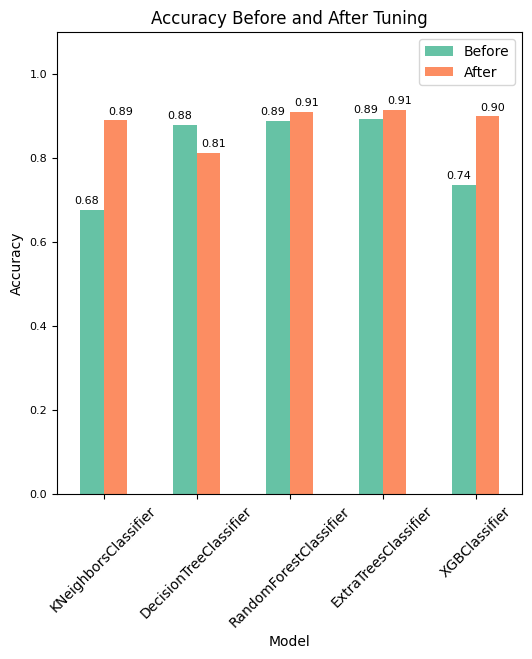

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# Plot the 'Before' and 'After' columns as a grouped bar plot
palette = sns.color_palette("Set2")
joined_df.plot(kind='bar', x='Model', y=['Before', 'After'], color=palette, ax=ax)

for i, (model, accuracy) in enumerate(zip(joined_df["Model"], joined_df["Before"])):
    plt.text(i-0.05, accuracy + 0.01, f"{accuracy:.2f}", ha="right", va="bottom", fontsize=8)

for i, (model, accuracy) in enumerate(zip(joined_df["Model"], joined_df["After"])):
    plt.text(i+0.05, accuracy + 0.01, f"{accuracy:.2f}", ha="left", va="bottom", fontsize=8)
# Set the title and labels
ax.set_title('Accuracy Before and After Tuning')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.yticks(fontsize=8)
plt.ylim(top=1.1)
plt.show()

### Predicting Genetic Disorder
Using the Best Classifier

In [ ]:
#Genetic Disorder classification

X_train, y_train, X_test, y_test = batches[0][0], batches[0][1], batches[0][2], batches[0][3]

clf = ExtraTreesClassifier(min_samples_split = 2,
                             min_samples_leaf = 1,
                             max_features = 'log2',
                             max_depth = 20,
                             criterion = 'entropy',
                             random_state = 42,)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9125455491931286


### Disorder Subclass

In [ ]:
X = scaled_X.copy()
y = clf.predict(X).reshape(-1,1)
y_sub = y_sub.reshape(-1,1)
data_sub = np.concatenate((X,y,y_sub), axis=1)
labels = ('PCA1','PCA2','PCA3','PCA4','PCA5','Genetic Disorder','Disorder Subclass')
data_sub = pd.DataFrame(data=data_sub, columns=labels)

In [ ]:
data_sub.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,Genetic Disorder,Disorder Subclass
0,0.651091,0.279110,0.560235,0.287170,0.963512,1.0,2.0
1,0.227030,0.302755,0.071407,0.179238,0.961147,0.0,7.0
2,0.312425,0.535315,0.314644,0.507797,0.962864,2.0,6.0
3,0.752894,0.697265,0.918413,0.629361,0.494184,0.0,3.0
4,0.015370,0.258499,0.482663,0.758706,0.486843,2.0,1.0


In [ ]:


data_sub['Disorder Subclass'].value_counts()

Disorder Subclass
2.0    10353
3.0     9509
1.0     5447
5.0     4602
7.0     4225
6.0     2240
8.0      866
0.0      612
4.0      567
Name: count, dtype: int64

Resampling

In [ ]:
resample_data_sub = data_sub.copy()
resample_data_sub = resample(resample_data_sub, 'Disorder Subclass', 'max')
print(resample_data_sub['Disorder Subclass'].value_counts())

Disorder Subclass
3.0    10353
1.0    10353
5.0    10353
4.0    10353
0.0    10353
8.0    10353
2.0    10353
6.0    10353
7.0    10353
Name: count, dtype: int64


In [ ]:
X = resample_data_sub.copy()
y = X['Disorder Subclass'].to_numpy()
X = X.drop(['Disorder Subclass'],axis=1).to_numpy()

Prediction And Evaluation

Accuracy for KNeighborsClassifier : 0.8979791095336795


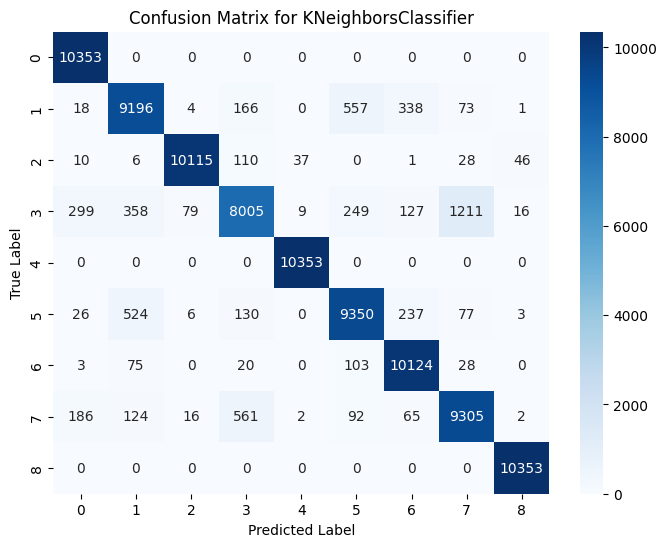

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10353
         1.0       0.89      0.89      0.89     10353
         2.0       0.99      0.98      0.98     10353
         3.0       0.89      0.77      0.83     10353
         4.0       1.00      1.00      1.00     10353
         5.0       0.90      0.90      0.90     10353
         6.0       0.93      0.98      0.95     10353
         7.0       0.87      0.90      0.88     10353
         8.0       0.99      1.00      1.00     10353

    accuracy                           0.94     93177
   macro avg       0.93      0.94      0.93     93177
weighted avg       0.93      0.94      0.93     93177

Accuracy for DecisionTreeClassifier : 0.9767539271990768


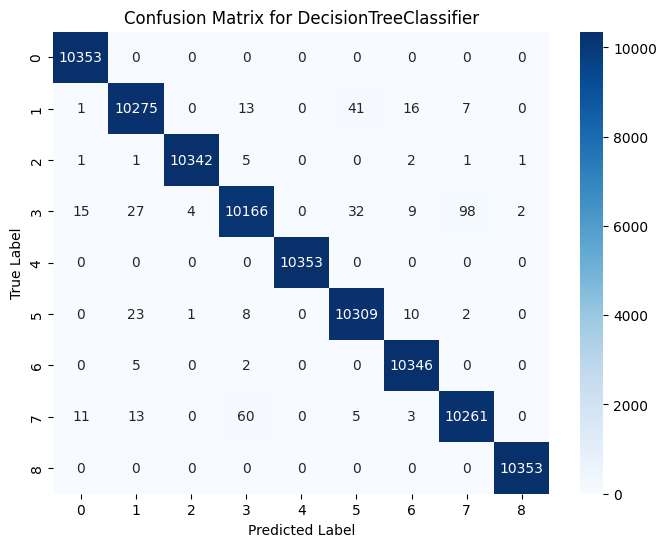

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10353
         1.0       0.99      0.99      0.99     10353
         2.0       1.00      1.00      1.00     10353
         3.0       0.99      0.98      0.99     10353
         4.0       1.00      1.00      1.00     10353
         5.0       0.99      1.00      0.99     10353
         6.0       1.00      1.00      1.00     10353
         7.0       0.99      0.99      0.99     10353
         8.0       1.00      1.00      1.00     10353

    accuracy                           1.00     93177
   macro avg       1.00      1.00      1.00     93177
weighted avg       1.00      1.00      1.00     93177

Accuracy for RandomForestClassifier : 0.9794048033490721


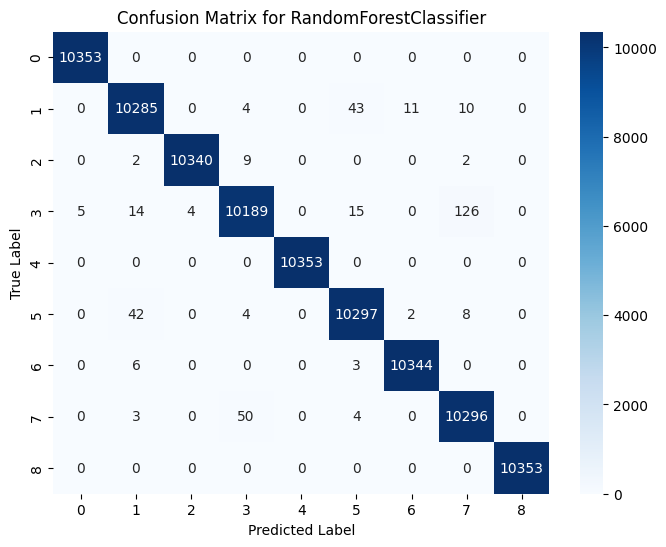

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10353
         1.0       0.99      0.99      0.99     10353
         2.0       1.00      1.00      1.00     10353
         3.0       0.99      0.98      0.99     10353
         4.0       1.00      1.00      1.00     10353
         5.0       0.99      0.99      0.99     10353
         6.0       1.00      1.00      1.00     10353
         7.0       0.99      0.99      0.99     10353
         8.0       1.00      1.00      1.00     10353

    accuracy                           1.00     93177
   macro avg       1.00      1.00      1.00     93177
weighted avg       1.00      1.00      1.00     93177

Accuracy for ExtraTreesClassifier : 0.9787286401886929


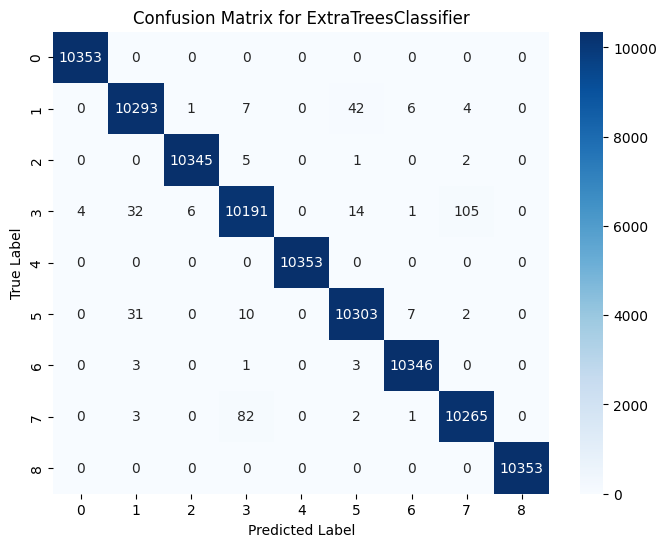

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10353
         1.0       0.99      0.99      0.99     10353
         2.0       1.00      1.00      1.00     10353
         3.0       0.99      0.98      0.99     10353
         4.0       1.00      1.00      1.00     10353
         5.0       0.99      1.00      0.99     10353
         6.0       1.00      1.00      1.00     10353
         7.0       0.99      0.99      0.99     10353
         8.0       1.00      1.00      1.00     10353

    accuracy                           1.00     93177
   macro avg       1.00      1.00      1.00     93177
weighted avg       1.00      1.00      1.00     93177

Accuracy for XGBClassifier : 0.9072303511620214


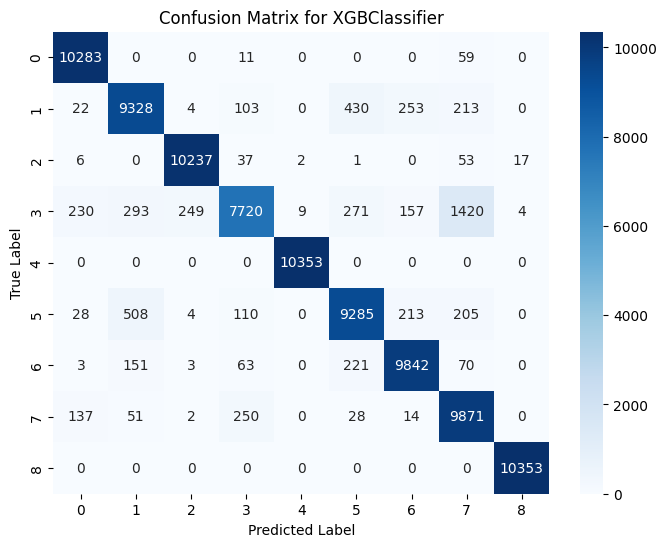

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     10353
         1.0       0.90      0.90      0.90     10353
         2.0       0.98      0.99      0.98     10353
         3.0       0.93      0.75      0.83     10353
         4.0       1.00      1.00      1.00     10353
         5.0       0.91      0.90      0.90     10353
         6.0       0.94      0.95      0.94     10353
         7.0       0.83      0.95      0.89     10353
         8.0       1.00      1.00      1.00     10353

    accuracy                           0.94     93177
   macro avg       0.94      0.94      0.94     93177
weighted avg       0.94      0.94      0.94     93177



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
]

accuracies = {}
conf_matrices = {}

for model in models:
    accuracy, _ = k_fold_cross_validation(model, X, y, 5, True)
    print(f"Accuracy for {type(model).__name__} : {accuracy}")
    accuracies[type(model).__name__] = accuracy
    df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
    df.to_csv('subclass_model_acc.csv', index=False)

    y_pred = model.predict(X)

    conf_matrix = confusion_matrix(y, y_pred)
    conf_matrices[type(model).__name__] = conf_matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(classification_report(y, y_pred))

Plotting Accuracies of Subclass

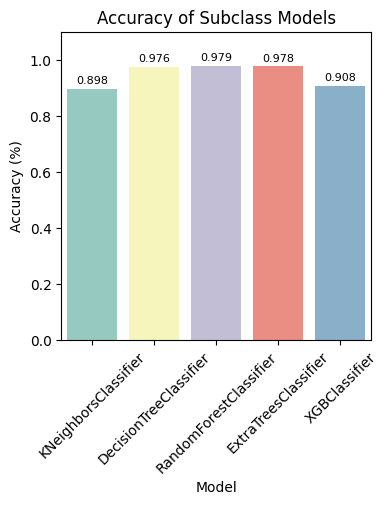

In [ ]:
mod_acc = df
plt.figure(figsize=(4, 4))

sns.barplot(data=mod_acc, x="Model", y="Accuracy", palette="Set3")

plt.title("Accuracy of Subclass Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=10)

# Add the values to every plot
for i, (model, accuracy) in enumerate(zip(mod_acc["Model"], mod_acc["Accuracy"])):
    plt.text(i, accuracy + 0.01, f"{accuracy:.3f}", ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.ylim(top=1.1)

plt.show()

Train-Test splitting

In [ ]:
# Train Test splitting
def train_test_split(X,y,test_size=0.2):
    split_idx = len(X) - int(test_size * len(X))
    train_X, train_y = X[:split_idx], y[:split_idx]
    test_X, test_y = X[split_idx:], y[split_idx:]
    return train_X, train_y, test_X, test_y

In [ ]:
batches = []
for i in range(1,4,1):
    size = i/10
    train_X, train_y, test_X, test_y = train_test_split(X,y,size)
    batch = [train_X, train_y, test_X, test_y]
    batches.append(batch)

### Hyperparameter Tuning

KNN

> *Highest Accuracy for KNeighborsClassifier: 0.9793*



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model_name = KNeighborsClassifier()
best_accuracies = {}

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=KNeighborsClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    # Update the highest accuracy attained for this batch
    highest_accuracy = max(highest_accuracy, test_score)

# Store the highest accuracy attained for this model

best_accuracies[type(model_name).__name__] = highest_accuracy

# Print the highest accuracy attained for this model
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.9792851776322851
--------------------------------------------------
Batch  2
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.9771397907163939
--------------------------------------------------
Batch  3
Best Hyperparameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Score : 0.9702715272063821
--------------------------------------------------

Highest Accuracy for KNeighborsClassifier: 0.9793


Decision Tree

> *Highest Accuracy for DecisionTreeClassifier: 0.9505*



In [ ]:
# Decision tree
model_name = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    highest_accuracy = max(highest_accuracy, test_score)


best_accuracies[type(model_name).__name__] = highest_accuracy

print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.9505205538263389
--------------------------------------------------
Batch  2
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.9438690635900188
--------------------------------------------------
Batch  3
Best Hyperparameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}
Score : 0.934354094372697
--------------------------------------------------

Highest Accuracy for DecisionTreeClassifier: 0.9505


Random Forest

> *Highest Accuracy for RandomForestClassifier: 0.9819*



In [ ]:
# Random forest
model_name = RandomForestClassifier()
param_grid = {
    'n_estimators': [50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'random_state': [42],
}
highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator = RandomForestClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv=5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)

    highest_accuracy = max(highest_accuracy, test_score)


best_accuracies[type(model_name).__name__] = highest_accuracy

print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.9818611140925191
--------------------------------------------------
Batch  2
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.9798229138717467
--------------------------------------------------
Batch  3
Best Hyperparameters for RandomForestClassifier : {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Score : 0.9744213501234215
--------------------------------------------------

Highest Accuracy for RandomForestClassifier: 0.9819


Extra Trees

> *Highest Accuracy for ExtraTreesClassifier: 0.9823*



In [ ]:
# Extra trees
model_name = ExtraTreesClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30 ,40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=ExtraTreesClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)
    highest_accuracy = max(highest_accuracy, test_score)

best_accuracies[type(model_name).__name__] = highest_accuracy
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.9822904368358913
--------------------------------------------------
Batch  2
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.9799302387979608
--------------------------------------------------
Batch  3
Best Hyperparameters for ExtraTreesClassifier : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Score : 0.975244159839731
--------------------------------------------------

Highest Accuracy for ExtraTreesClassifier: 0.9823


XGB

> *Highest Accuracy for XGBClassifier: 0.9800*



In [ ]:
# XGB Classifier
model_name = XGBClassifier()
param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 1]
}

highest_accuracy = -np.inf

for i in range(0,len(batches),1):
    print('Batch ', i+1)
    randomized_search = RandomizedSearchCV(
        estimator=XGBClassifier(),
        param_distributions = param_grid,
        random_state = 42,
        n_jobs = -1,
        cv = 5
    )
    randomized_search.fit(batches[i][0], batches[i][1])
    test_score = randomized_search.score(batches[i][2], batches[i][3])
    print(f'Best Hyperparameters for {type(model_name).__name__} : {randomized_search.best_params_}')
    print(f'Score : {test_score}')
    print('-'*50)
    highest_accuracy = max(highest_accuracy, test_score)

best_accuracies[type(model_name).__name__] = highest_accuracy
print(f"\nHighest Accuracy for {type(model_name).__name__}: {highest_accuracy:.4f}")

Batch  1
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.9800364924331867
--------------------------------------------------
Batch  2
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.9779447276629998
--------------------------------------------------
Batch  3
Best Hyperparameters for XGBClassifier : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Score : 0.97231066432941
--------------------------------------------------

Highest Accuracy for XGBClassifier: 0.9800


In [ ]:
frame=pd.DataFrame(list(best_accuracies.items()), columns=['Model', 'Accuracy'])
frame.to_csv('subclass_tuning_acc.csv', index=False)
tun_acc=pd.read_csv('subclass_tuning_acc.csv')

In [ ]:
joined_df = pd.merge(mod_acc, tun_acc,on='Model')
joined_df = joined_df.rename(columns={'Accuracy_x': 'Before', 'Accuracy_y': 'After'})
joined_df

,Model,Before,After
0,KNeighborsClassifier,0.897582,0.979285
1,DecisionTreeClassifier,0.976121,0.950521
2,RandomForestClassifier,0.978696,0.981861
3,ExtraTreesClassifier,0.977838,0.982290
4,XGBClassifier,0.907853,0.980036


Comparing the Accuracies Before and After tuning

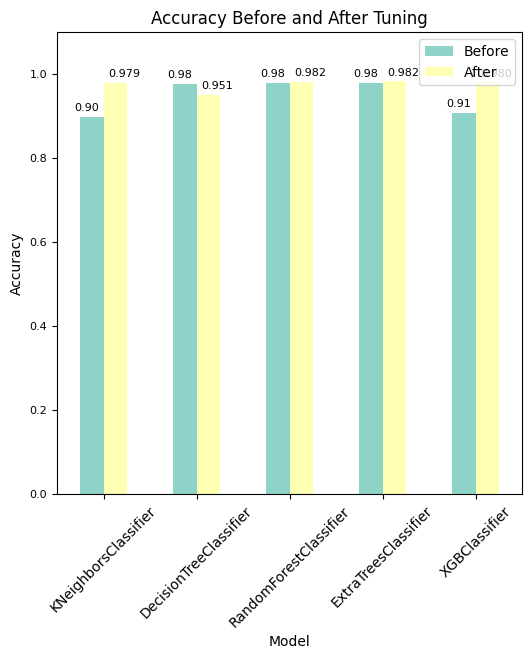

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# Plot the 'Before' and 'After' columns as a grouped bar plot
palette = sns.color_palette("Set3")
joined_df.plot(kind='bar', x='Model', y=['Before', 'After'], color=palette, ax=ax)

for i, (model, accuracy) in enumerate(zip(joined_df["Model"], joined_df["Before"])):
    plt.text(i-0.05, accuracy + 0.01, f"{accuracy:.2f}", ha="right", va="bottom", fontsize=8)

for i, (model, accuracy) in enumerate(zip(joined_df["Model"], joined_df["After"])):
    plt.text(i+0.05, accuracy + 0.01, f"{accuracy:.3f}", ha="left", va="bottom", fontsize=8)
# Set the title and labels
ax.set_title('Accuracy Before and After Tuning')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.yticks(fontsize=8)
plt.ylim(top=1.1)
plt.show()

### Predicting Disorder Subclass

Using the Best Classifier



In [ ]:
X_train, y_train, X_test, y_test = batches[0][0], batches[0][1], batches[0][2], batches[0][3]

clf = ExtraTreesClassifier(min_samples_split = 4,
                             min_samples_leaf = 1,
                             max_features = 'log2',
                             max_depth = 20,
                             criterion = 'entropy',
                             random_state = 42,)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9828270902651068
